# Training and errors analysis

## Imports and initializations

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from pipeline.core import KerasTrainingReport

Using TensorFlow backend.
/home/ghiles/.virtualenvs/data_science/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
%matplotlib inline

## Utils

In [4]:
def dispay_image(row):
    """row is a 1D numpy array of int."""
    plt.imshow(255 - row.reshape(28, 28), cmap='gray', vmin=0, vmax=255)
    plt.show()
    return None

## Read data

In [5]:
train_df = pd.read_csv('data/train.csv', sep=',', encoding='utf-8')
train_df.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
valid_df = pd.read_csv('data/valid.csv', sep=',', encoding='utf-8')
valid_df.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
valid_predictions_df = pd.read_csv('valid_predictions.csv', sep=',', encoding='utf-8')
valid_predictions_df.head(2)

,ImageId,Label
0,1,7
1,2,3


In [8]:
len(train_df), len(valid_df), len(valid_predictions_df)

(33600, 8400, 8400)

## Training analysis

In [9]:
training_report = KerasTrainingReport.load('cnn.report')

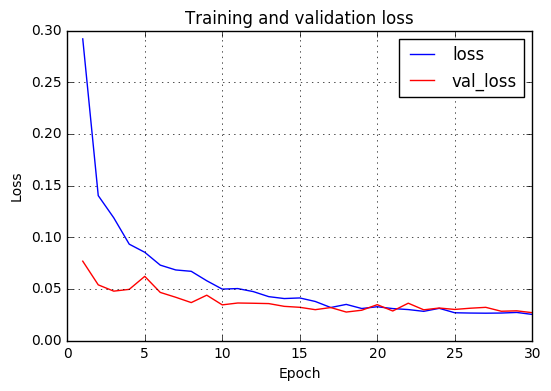

In [10]:
training_report.display_loss_curve()

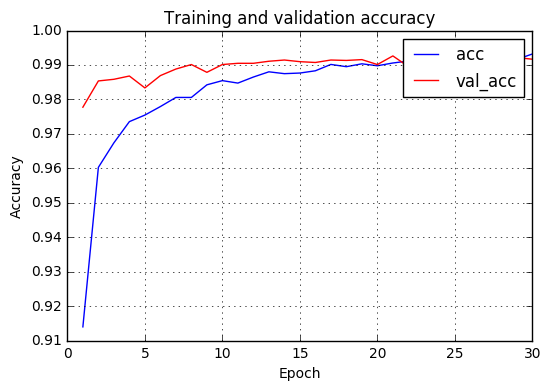

In [11]:
training_report.display_acc_curve()

## Errors analysis

In [12]:
true_labels = valid_df['label'].values
predicted_labels = valid_predictions_df['Label'].values
true_labels.shape, predicted_labels.shape

((8400,), (8400,))

In [13]:
evaluation_df = {'y_true': true_labels, 'y_pred': predicted_labels}
evaluation_df = pd.DataFrame(evaluation_df, columns=['y_true', 'y_pred'])
evaluation_df.head()

,y_true,y_pred
0,7,7
1,3,3
2,7,7
3,3,3
4,0,0


In [14]:
len(evaluation_df)

8400

In [15]:
wrong_predictions_ixes = []

for ix, (true_label, predicted_label) in enumerate(zip(true_labels, predicted_labels)):
    if true_label != predicted_label:
        wrong_predictions_ixes.append(ix)
        
len(wrong_predictions_ixes)

70

### Misclassifications distributions

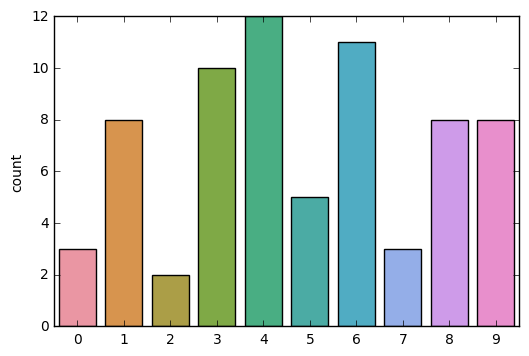

In [16]:
sns.countplot(true_labels[wrong_predictions_ixes])
plt.show()

### Confusion matrix of errors

In [17]:
confusion_matrix = {
    'y_true': true_labels[true_labels != predicted_labels],
    'y_pred': predicted_labels[true_labels != predicted_labels]
}

confusion_matrix = pd.DataFrame(confusion_matrix, columns=['y_true','y_pred'])
confusion_matrix = pd.crosstab(confusion_matrix['y_true'],
                               confusion_matrix['y_pred'],
                               rownames=['True label'],
                               colnames=['Predicted label'])

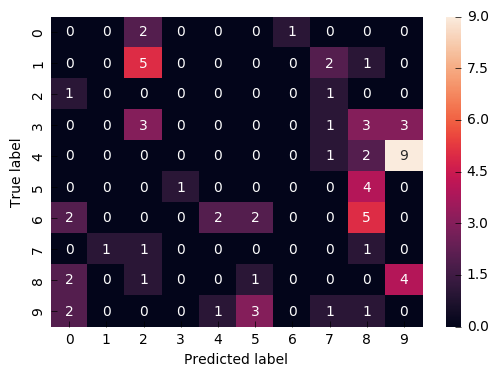

In [18]:
sns.heatmap(confusion_matrix, annot=True)
plt.show()

### Visualize some images

In [19]:
def visualize_errors(true_label, predicted_label, n_images=1):
    n_cols = 3
    
    samples_of_interest_df = valid_df.loc[(evaluation_df['y_true'] == true_label) & (evaluation_df['y_pred'] == predicted_label)]
    samples_of_interest_df = samples_of_interest_df.drop(['label'], axis=1).copy()
    n_images = min(n_images, len(samples_of_interest_df))
    samples_of_interest_df = samples_of_interest_df.sample(n_images)
    
    n_rows = int((n_images - 1) / n_cols) + 1
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
    for i, (_, row) in enumerate(samples_of_interest_df.iterrows()):
        if n_rows > 1:
            ax = axes[int(i / n_cols), i % n_cols]
        else:
            ax = axes[i % n_cols]
        ax.axis('off')
        ax.imshow(255 - row.values.reshape(28, 28), cmap='gray', vmin=0, vmax=255)
    
    return None

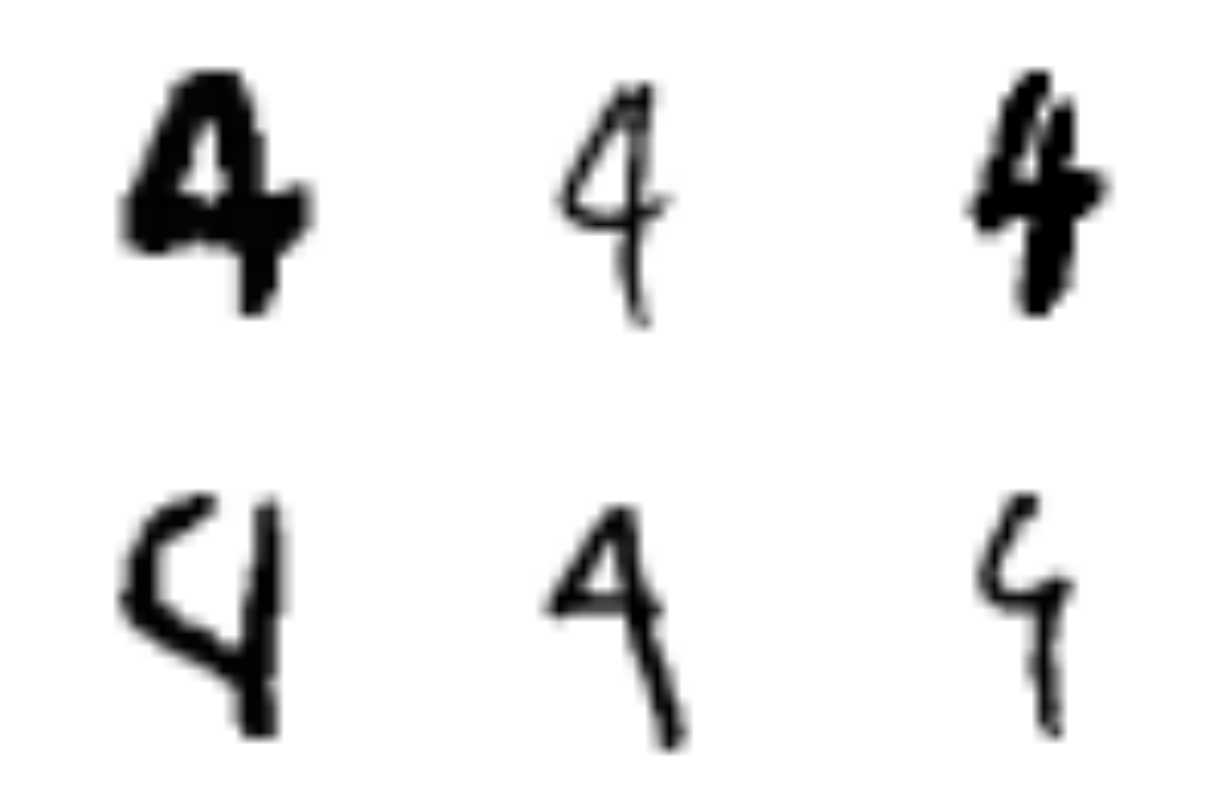

In [20]:
true_label = 4
predicted_label = 9
n_images=6
visualize_errors(true_label=true_label, predicted_label=predicted_label, n_images=n_images)